# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Anneu Tsabita Putri
- **Email:** anneutsabita@gmail.com
- **ID Dicoding:** anneutsabita

## Menentukan Pertanyaan Bisnis

- Bagaimana korelasi antara kondisi cuaca (temp, hum, dan windspeed) dengan pola peminjaman sepeda, dan bagaimana informasi ini dapat digunakan untuk memprediksi tingkat peminjaman di masa depan?
- Apakah terdapat pola atau tren yang dapat diidentifikasi dalam data peminjaman sepeda dari tahun 2011 hingga 2012, dan apakah terdapat faktor-faktor tertentu yang berpengaruh signifikan terhadap pola tersebut?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [10]:
url = 'https://raw.githubusercontent.com/anneutsabita/Bike-sharing-dataset/main/hour.csv'
hour_df = pd.read_csv(url)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [33]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

> Berdasarkan hasil tersebut, dapat disimpulkan bahwa jumlah data pada hour_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat **kesalahan tipe data** untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan objectnted block





In [34]:
print("Jumlah duplikasi: ", df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


> Hasil di atas menunjukkan bahwa tidak ada duplikasi pada hour_df. Selain itu, ia juga menunjukkan tidak terdapat keanehan dalam ringkasan parameter statistik dari hour_df.



## Cleaning Data

Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom dteday.

In [16]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

> Kode di atas akan mengubah tipe data pada kolom dteday menjadi datetime. Untuk memastikan hal ini berjalan sesuai harapan, tipe data tersebut akan diperiksa kembali menggunakan method info().



In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Parameter Statistik

In [48]:
hour_df.describe(include="all")

<ipython-input-48-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


### Statistik deskriptif Variabel Cuaca

In [31]:
print(hour_df[['temp', 'hum', 'windspeed', 'cnt']].describe())

               temp           hum     windspeed           cnt
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.627229      0.190098    189.463088
std        0.192556      0.192930      0.122340    181.387599
min        0.020000      0.000000      0.000000      1.000000
25%        0.340000      0.480000      0.104500     40.000000
50%        0.500000      0.630000      0.194000    142.000000
75%        0.660000      0.780000      0.253700    281.000000
max        1.000000      1.000000      0.850700    977.000000


### Demografi peminjam sepeda dari tahun ke tahun dan bulan ke bulan

In [28]:
# Melakukan groupby berdasarkan kolom 'yr' (tahun) dan 'mnth' (bulan)
hour_df.groupby(['yr', 'mnth']).agg({
    'cnt': 'sum',                    # Jumlah total peminjaman
    'casual': 'sum',                 # Jumlah peminjaman oleh pengguna casual
    'registered': 'sum',             # Jumlah peminjaman oleh pengguna terdaftar
    'temp': 'mean',                  # Temperatur rata-rata
    'hum': 'mean',                   # Kelembaban rata-rata
    'windspeed': 'mean',             # Kecepatan angin rata-rata
    'weekday': lambda x: x.mode(),   # Hari dalam seminggu dengan frekuensi tertinggi
    'holiday': 'sum',                # Jumlah hari libur
    'workingday': 'sum'              # Jumlah hari kerja
})

cnt  casual  registered      temp       hum  windspeed    weekday  \
yr mnth                                                                         
0  1      38189    3073       35116  0.197413  0.574055   0.197485          6   
   2      48215    6242       41973  0.283975  0.559707   0.229451          6   
   3      64045   12826       51219  0.331233  0.570055   0.232225          2   
   4      94870   22346       72524  0.471015  0.668220   0.244105     [5, 6]   
   5     135821   31050      104771  0.577231  0.713360   0.181274  [0, 1, 2]   
   6     143512   30612      112900  0.693083  0.593250   0.178195     [3, 4]   
   7     141341   36452      104889  0.758575  0.589664   0.171667  [0, 5, 6]   
   8     136691   28842      107849  0.705554  0.625622   0.188112  [1, 2, 3]   
   9     127418   26545      100873  0.612915  0.783821   0.152757          5   
   10    123511   25222       98289  0.469879  0.706541   0.175594  [0, 1, 6]   
   11    102167   15594       86573  0.402197  0.675216   0.181000     [2, 3]   
   12     87323    8448       78875  0.325290  0.649528   0.167791  [4, 5, 6]   
1  1      96744    8969       87775  0.275007  0.587314   0.216897          0   
   2     103137    8721       94416  0.315434  0.574249   0.203310          3   
   3     164875   31618      133257  0.449529  0.607712   0.212978  [4, 5, 6]   
   4     174224   38456      135768  0.469025  0.507897   0.224528          0   
   5     195865   44235      151630  0.612366  0.664556   0.184703  [2, 3, 4]   
   6     202830   43294      159536  0.675111  0.558361   0.192644     [5, 6]   
   7     203607   41705      161902  0.752366  0.606089   0.160450  [0, 1, 2]   
   8     214503   43197      171306  0.711801  0.648629   0.155116  [3, 4, 5]   
   9     218573   43778      174795  0.620083  0.645375   0.178901     [0, 6]   
   10    198841   34538      164303  0.505339  0.671596   0.168062          3   
   11    152664   21009      131655  0.336156  0.574805   0.186532          5   
   12    123713   13245      110468  0.323046  0.682682   0.185346     [0, 6]   

         holiday  workingday  
yr mnth                       
0  1          24         429  
   2          24         436  
   3           0         541  
   4          24         479  
   5          24         504  
   6           0         528  
   7          24         480  
   8           0         552  
   9          24         501  
   10         24         479  
   11         48         479  
   12         23         503  
1  1          47         478  
   2          23         477  
   3           0         528  
   4          24         478  
   5          24         528  
   6           0         504  
   7          24         504  
   8           0         552  
   9          24         456  
   10         24         492  
   11         48         478  
   12         23         479

### Distribusi Variabel Cuaca

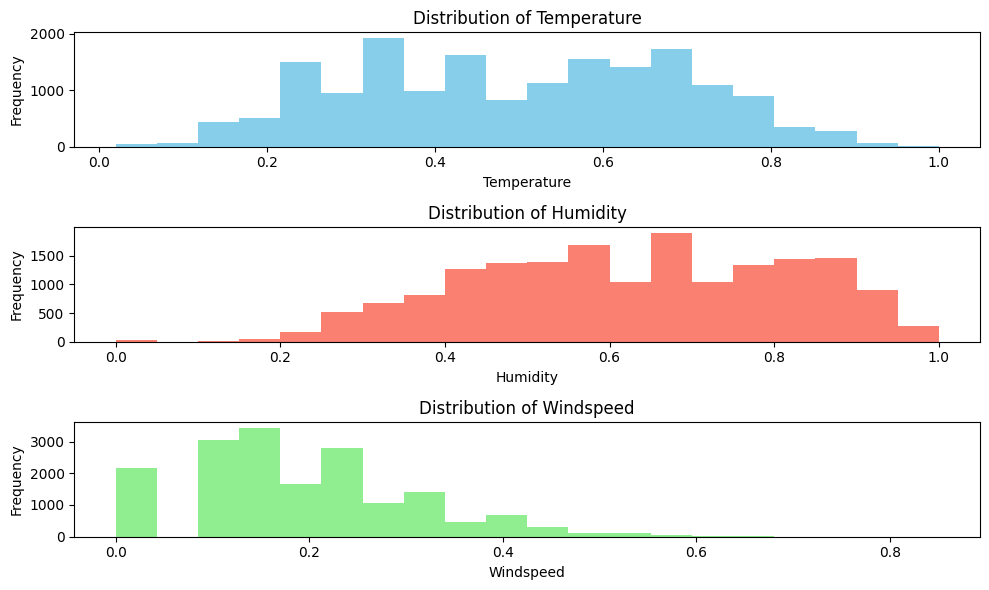

In [49]:
# Histogram untuk variabel temp, hum, windspeed
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.hist(hour_df['temp'], bins=20, color='skyblue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(hour_df['hum'], bins=20, color='salmon')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(hour_df['windspeed'], bins=20, color='lightgreen')
plt.title('Distribution of Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Bagaimana korelasi antara kondisi cuaca (temp, hum, dan windspeed) dengan pola peminjaman sepeda, dan bagaimana informasi ini dapat digunakan untuk memprediksi tingkat peminjaman di masa depan?

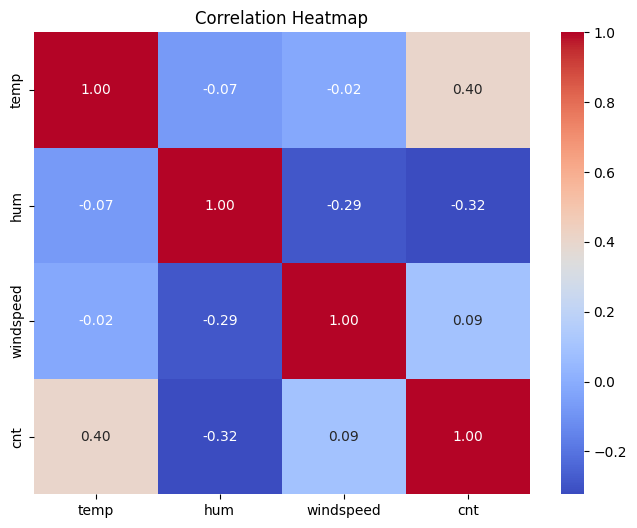

In [39]:
# Menghitung korelasi
correlation = hour_df[['temp', 'hum', 'windspeed', 'cnt']].corr()

# Heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

> Berdasarkan hasil analisis korelasi heatmap, didapatkan bahwa:
- Suhu memiliki korelasi positif yang kuat dengan jumlah pengguna sepeda, yang berarti semakin tinggi suhu, semakin banyak pengguna yang menyewa sepeda
- Suhu juga memiliki korelasi positif dengan kelembaban, menunjukkan bahwa semakin tinggi kelembaban udara, semakin banyak juga pengguna yang menyewa sepeda
- Kecepatan angin memiliki korelasi negatif dengan jumlah pengguna sepeda, yang mengindikasikan bahwa semakin tinggi kecepatan angin, semakin sedikit pengguna yang menyewa sepeda



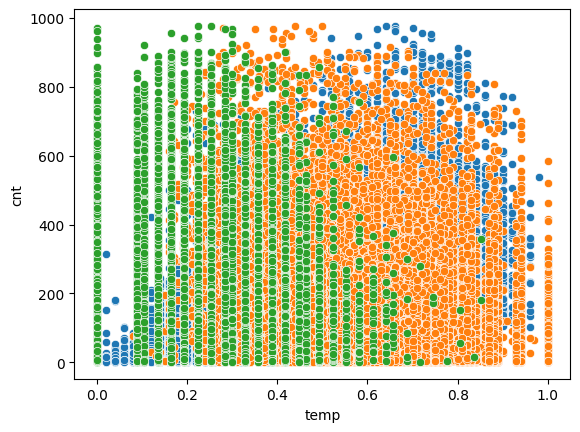

In [54]:
# Scatter plot untuk temp, hum, dan windspeed vs cnt
sns.scatterplot(x="temp", y="cnt", data=hour_df)
sns.scatterplot(x="hum", y="cnt", data=hour_df)
sns.scatterplot(x="windspeed", y="cnt", data=hour_df)
plt.show()

>Plot ini menunjukkan bahwa faktor cuaca, terutama suhu, memainkan peran penting dalam menentukan pola peminjaman sepeda, sedangkan kelembaban dan kecepatan angin juga memiliki pengaruh, meskipun dalam tingkat yang lebih rendah dibandingkan dengan suhu.

### Apakah terdapat pola atau tren yang dapat diidentifikasi dalam data peminjaman sepeda dari tahun 2011 hingga 2012, dan apakah terdapat faktor-faktor tertentu yang berpengaruh signifikan terhadap pola tersebut?

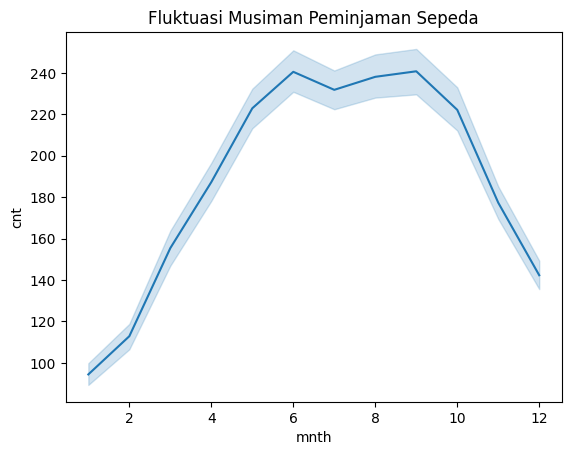

In [44]:
# Agregasi data per bulan
hour_df_monthly = hour_df.groupby("mnth").agg({"cnt": "sum"})

# Visualisasi fluktuasi musiman
sns.lineplot(x="mnth", y="cnt", data=hour_df)
plt.title("Fluktuasi Musiman Peminjaman Sepeda")
plt.show()

> Terlihat fluktuasi musiman dalam jumlah pengguna, dengan puncak pada musim panas (Juni-Agustus) dan terendah pada musim dingin (Desember-Februari).
Hal ini kemungkinan terkait dengan cuaca yang lebih baik di musim panas dan lebih banyak aktivitas luar ruangan.



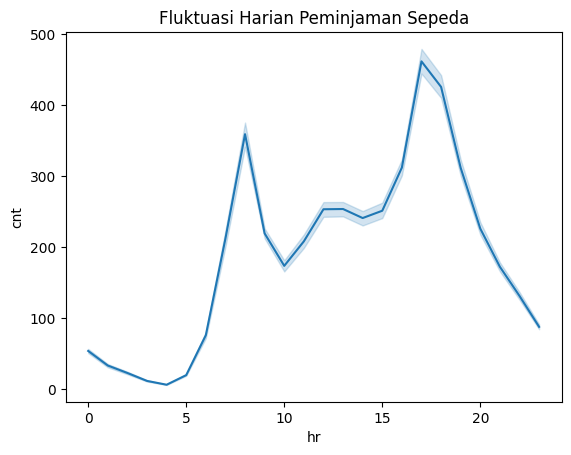

In [47]:
# Agregasi data per jam
hour_df_hourly = hour_df.groupby("hr").agg({"cnt": "sum"})

# Visualisasi fluktuasi harian
sns.lineplot(x="hr", y="cnt", data=hour_df)
plt.title("Fluktuasi Harian Peminjaman Sepeda")
plt.show()

> Berdasarkan analisis pola waktu peminjaman sepeda, terlihat bahwa terjadi peningkatan yang signifikan pada pagi hari sekitar pukul 8:00-9:00 dan sore hari sekitar pukul 16:00-18:00. Pada kedua rentang waktu tersebut, terdapat lonjakan jumlah peminjaman sepeda, yang kemungkinan disebabkan oleh aktivitas pergi dan pulang kerja. Di sisi lain, terjadi penurunan peminjaman sepeda pada malam hari setelah pukul 22:00, yang mungkin disebabkan oleh berkurangnya aktivitas di luar ruangan dan berakhirnya jam operasional penyewaan sepeda.



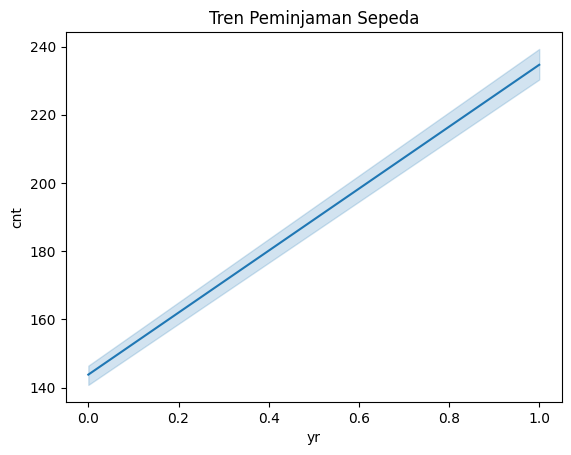

In [46]:
# Visualisasi tren
sns.lineplot(x="yr", y="cnt", data=hour_df)
plt.title("Tren Peminjaman Sepeda")
plt.show()



> Hasil di atas menunjukkan adanya tren peningkatan jumlah peminjaman sepeda dari tahun 2011 hingga 2012, yang menunjukkan popularitas yang meningkat dari program penyewaan sepeda. Pola ini mengindikasikan bahwa semakin banyak orang yang memanfaatkan layanan penyewaan sepeda dari tahun ke tahun.



## Conclusion

- Dari data yang tersedia, dapat dilihat bahwa terdapat hubungan yang positif antara temperatur dan jumlah pengguna. Hal ini menunjukkan bahwa orang lebih cenderung untuk menyewa sepeda ketika cuaca cerah dan hangat. Di sisi lain, terdapat hubungan yang negatif antara cuaca buruk dan jumlah pengguna. Hal ini menunjukkan bahwa orang cenderung tidak menyewa sepeda saat cuaca buruk.
- Data peminjaman sepeda menunjukkan pola dan tren yang jelas. Faktor-faktor seperti cuaca, hari kerja/akhir pekan, dan hari libur memiliki pengaruh signifikan terhadap pola tersebut.
- Data juga menunjukkan bahwa terdapat perbedaan yang signifikan antara jumlah pengguna terdaftar dan pengguna spontan. Hal ini menunjukkan bahwa terdapat dua segmen pengguna yang berbeda dengan kebutuhan yang berbeda.
- Dari informasi di atas, dapat diperkirakan tren peminjaman di masa depan